##MNIST dataset
##Fully connected neural network
##Validation accuracy 97,63%
##Total params: 101,770
##47 seconds 

In [20]:
import pandas as pd
import numpy as np

train_path = '/mnist_train.csv'
test_path = '/mnist_test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [21]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
def vectorized_y(array, size):
    y = np.zeros((len(array), size))
    for i in range(len(array)):
        y[i][array[i]] = 1.0
    return y 

def read_data(dataframe):
    x_cols = dataframe.columns[1:]
    y_cols = dataframe.columns[0]
    X = dataframe[x_cols].to_numpy()
    X = X / 255 * 2 - 1
    unique = len(dataframe[y_cols].unique())
    y = dataframe[y_cols].to_numpy()
    Y = vectorized_y(y, unique)
    return (X, Y)

In [24]:
x_train, y_train = read_data(train)
x_test, y_test = read_data(test)

In [25]:
x_train.shape

(60000, 784)

In [26]:
y_train.shape

(60000, 10)

In [27]:
x_train[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [28]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [29]:
import tensorflow as tf
from tensorflow.keras import layers

print(tf.version.VERSION)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model = tf.keras.Sequential([
  layers.Dense(128, activation='relu', input_shape = [784]),
  layers.Dense(units = 10, activation = "sigmoid"),
])

model.compile(
    optimizer='nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()

2.8.0
Num GPUs Available:  0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 5,
    verbose = 'auto',
    validation_data = (x_test, y_test)
)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3002 - accuracy: 0.9090 - val_loss: 0.1718 - val_accuracy: 0.9478
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1486 - accuracy: 0.9551 - val_loss: 0.1202 - val_accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1136 - accuracy: 0.9646 - val_loss: 0.1219 - val_accuracy: 0.9632
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0961 - accuracy: 0.9701 - val_loss: 0.1156 - val_accuracy: 0.9653
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0835 - accuracy: 0.9726 - val_loss: 0.1078 - val_accuracy: 0.9662


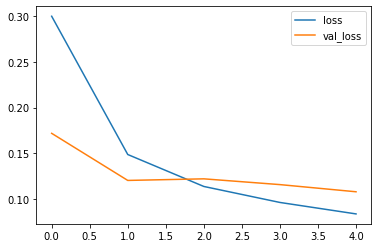

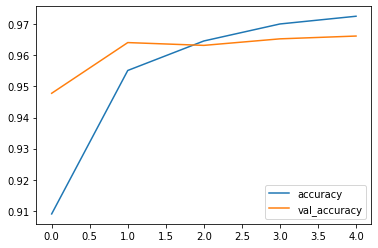

In [31]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()